# パラメトリックテスト

In [1]:
import pandas as pd
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## まずは前回のノーマリティテストを行なおう
**Question'** なぜ？   

**Answer'** パラメトリックテストはデータにガウス分布を仮定しているから

In [7]:
import numpy as np
from scipy.stats import shapiro

for i in range(df.shape[1]):
    stat, p = shapiro(df.iloc[:,i])
    print("", df.columns[i], "")
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Gaussian')
    else:
        print('Not look Gaussian')
    print()

 CRIM 
Statistics=0.448, p=0.000
Not look Gaussian

 ZN 
Statistics=0.556, p=0.000
Not look Gaussian

 INDUS 
Statistics=0.900, p=0.000
Not look Gaussian

 CHAS 
Statistics=0.275, p=0.000
Not look Gaussian

 NOX 
Statistics=0.936, p=0.000
Not look Gaussian

 RM 
Statistics=0.961, p=0.000
Not look Gaussian

 AGE 
Statistics=0.892, p=0.000
Not look Gaussian

 DIS 
Statistics=0.903, p=0.000
Not look Gaussian

 RAD 
Statistics=0.680, p=0.000
Not look Gaussian

 TAX 
Statistics=0.815, p=0.000
Not look Gaussian

 PTRATIO 
Statistics=0.904, p=0.000
Not look Gaussian

 B 
Statistics=0.477, p=0.000
Not look Gaussian

 LSTAT 
Statistics=0.937, p=0.000
Not look Gaussian



# おっと、ボストンデータは無理っぽい？
# 一応プロットもしてみよう

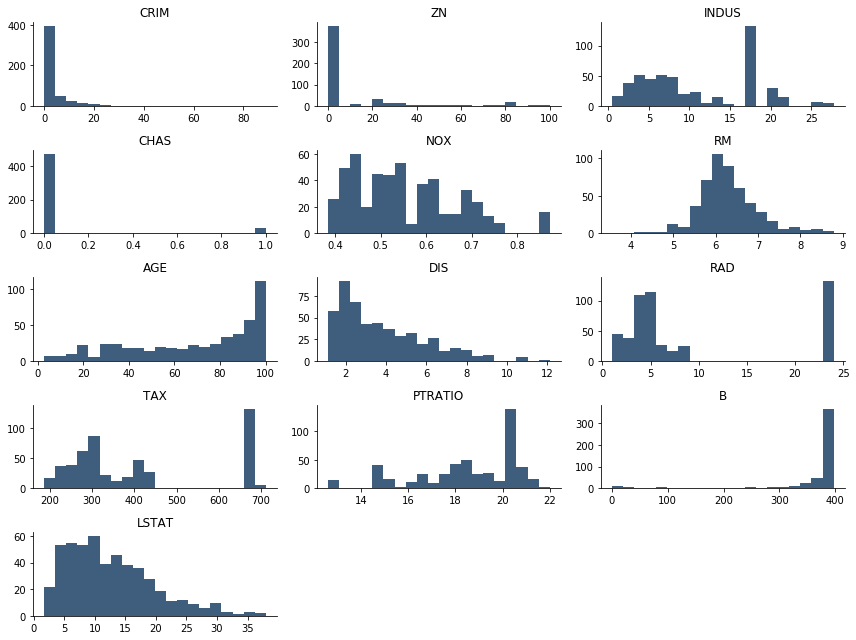

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12, 9))
for i in range(13):
    ax = plt.subplot(5,3,i+1)  
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
  
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left()  

    plt.title(df.columns[i]) 
    plt.hist(df.iloc[:,i], color="#3F5D7D", bins=20)
    plt.tight_layout() 

## RMがぽいじゃないか、他の検定でも確認してみる

In [15]:
from scipy.stats import normaltest
stat, p = normaltest(df.iloc[:,5])
print("", df.columns[5], "")
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('looks Gaussian')
else:
    print('Not look Gaussian')

 RM 
Statistics=37.896, p=0.000
Not look Gaussian


## だめやん、っちゅーことで前回のiris使おう

In [16]:
from sklearn.datasets import load_iris
iris = load_iris()

iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
for i in range(iris_data.shape[1]):
    stat, p = shapiro(iris_data.iloc[:,i])
    print("", iris_data.columns[i], "")
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Gaussian')
    else:
        print('Not look Gaussian')
    print()

 sepal length (cm) 
Statistics=0.976, p=0.010
Not look Gaussian

 sepal width (cm) 
Statistics=0.984, p=0.075
Gaussian

 petal length (cm) 
Statistics=0.876, p=0.000
Not look Gaussian

 petal width (cm) 
Statistics=0.903, p=0.000
Not look Gaussian



# sepal width (cm) これ使う！

In [62]:
print("", iris_data.columns[1], "")
print('mean: ', np.mean(iris_data.iloc[:,1]))
print('variance ', np.var(iris_data.iloc[:,1], ddof=1))
# 不偏分散になってる注意
print('sample ', 150)

 sepal width (cm) 
mean:  3.0540000000000007
variance  0.18800402684563763
sample  150


# 標本平均が約3.0cmってことは母平均も3.0cmなんじゃね？
## 母平均に対する検定
$H_0: \mu = 3.0$   
$H_1: \mu \neq 3.0$   

母分散が分からへん時は？   
# Student t test
$$  t = \frac{\bar{X} - \mu}{ \frac{s^2}{\sqrt{n}} }  $$

In [34]:
z = (np.mean(iris_data.iloc[:,1]) - 3)/(np.sqrt(np.var(iris_data.iloc[:,1], ddof=1)/150))
z # statistic

1.5253019083062707

In [46]:
import scipy.stats as st
p = st.t.pdf(z, df=150-1)
p # p-value

0.12459986648026626

# ライブラリを使うと

In [43]:
t,p = st.ttest_1samp(iris_data.iloc[:,1], 3)
print(t,'',p)

1.5253019083062584  0.1293036245318499


## なんかちょっと数値違うけどあっているはず
$\alpha=0.05$とすると   
$$ \alpha < p$$
より$H_0$は棄却されない

/Users/kiwamizamurai/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


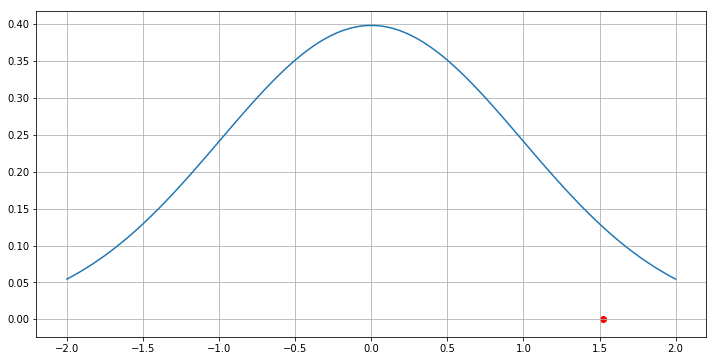

In [61]:
x = np.linspace(-2,2,100)
plt.figure(figsize=(12,6))
plt.plot(x, st.t(150-1).pdf(x))
plt.scatter(z,0,c='red')
plt.grid('True')

#  結局、統計量tとp値って何？
- https://research.miidas.jp/2019/01/ねぇpython、parametric-testって何？（理論編）/

統計量tは、t検定を使うための数値   
p値は、$H_0$の仮定のもとでのその統計量をとる確率   

### 上の図に注目
今回の統計量は**赤い点**でそれをとる確率(p-value)は0.12だった。   有意水準$(\alpha)$　＝（ありえないのギリギリ）（仮説の閾値）（許せる範囲）   
を$\alpha = 0.05$とすると
$$ 0.05 < 0.12 $$
であるが、これは
#### めっちゃありえなくない
ということ、つまり、あり得る、と考えるので$H_0$を採択。   

ちなみにcritical pointとはp値を使うんじゃなくて統計量で判断する時の数値、例えば両側検定をz検定で行う時に$\alpha = 0.05$とすると   
critical point = $\pm 1.96  \Longrightarrow  P(|z|>1.96) = 0.05$   になる。つまり、統計量zが$|z| > 1.96$なら$H_0$を棄却する　　　 

言葉を変えると統計量がcritical pointより外側にあれば珍しすぎる現象だからありえない、という理由によって$H_0$は棄却される。